In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

sns.set(rc={'figure.figsize':(20,40)})

In [41]:
file_path = "Log Reports/New Logs/"

In [42]:
def read_data(file):
    f = open(file, 'r')
    d_data = []
    g_data = []
    
    for line in f:
        split_line = line.split(" ")
        d_data.append(float(split_line[0]))
        g_data.append(float(split_line[1]))
        
    return d_data, g_data

In [43]:
def combine_data(d_data, g_data, cols):
    diff = pd.DataFrame(columns = cols)
    
    n = 1
    sum_g = 0
    avg_g = 0
    
    sum_d = 0
    avg_d = 0

    for i in range(0, len(g_data)):
        sum_g += g_data[i]
        sum_d += d_data[i]

        avg_g = sum_g/n
        avg_d = sum_d/n

        diff = diff.append({'Batch': i+1, 
                                      'Type': "Generator", 
                                      'Loss-g_%.1f-d_%.1f' % (g, d): g_data[i],
                                      'Run_Avg-g_%.1f-d_%.1f' % (g, d): avg_g,
                                     }, ignore_index=True)

        diff = diff.append({'Batch': i+1, 
                                      'Type': "Discriminator", 
                                      'Loss-g_%.1f-d_%.1f' % (g, d): d_data[i],
                                      'Run_Avg-g_%.1f-d_%.1f' % (g, d): avg_d,
                                     }, ignore_index=True)

        n += 1
        
    return diff

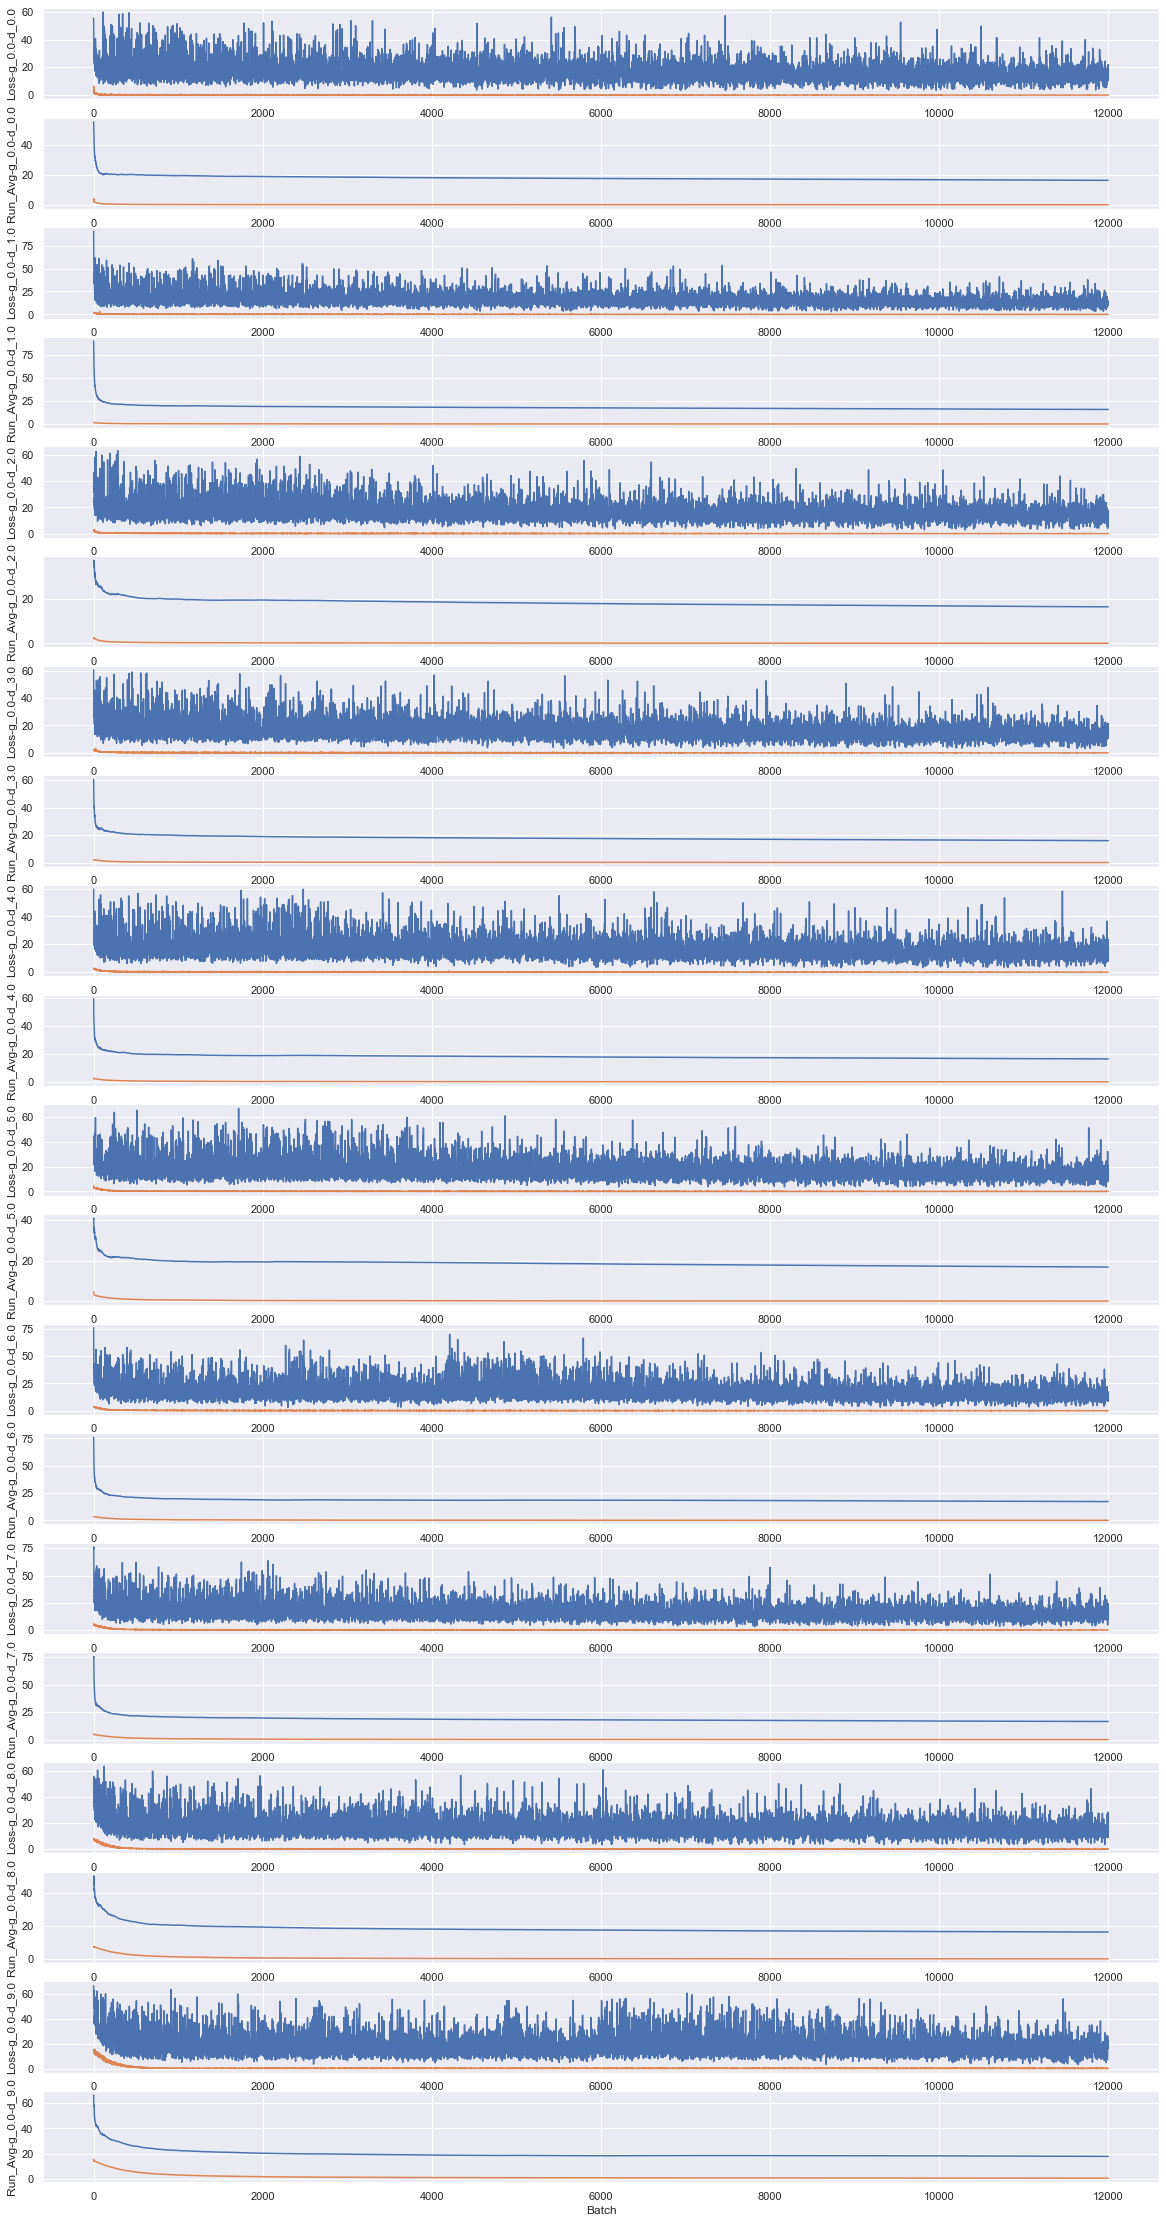

In [44]:
g = 0
d = 0
i = 0
fig, ax = plt.subplots(20,1)

# for g in range(0,1,0.1):
for d in range(0,10):
    tmp_name = "Log_Report_g_%.1f_d_%.1f.txt" % (g*0.1, d*0.1)
    d_data, g_data = read_data(file_path + tmp_name)

    cols = [
        'Batch',
        'Type',
        'Loss-g_%.1f-d_%.1f' % (g, d),
        'Run_Avg-g_%.1f-d_%.1f' % (g, d),
    ]

    diff = combine_data(d_data, g_data, cols)

    sns.lineplot(x="Batch", y='Loss-g_%.1f-d_%.1f' % (g, d),
                 hue="Type", markers=True, 
                 dashes=False, data=diff, legend=False,
                 ax=ax[i])
    sns.lineplot(x="Batch", y='Run_Avg-g_%.1f-d_%.1f' % (g, d),
                 hue="Type", markers=True, 
                 dashes=False, data=diff, legend=False,
                 ax=ax[i+1])
    
    i += 2

In [ ]:
diff